In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
import scipy.stats as st

In [6]:
# import csv file
df = pd.read_csv('./train.csv')
original_size = len(df)
#df.head(10)

df = pd.DataFrame(df['bidprice'], columns=['bidprice'])
df = df.dropna()
size_after_drop_na = len(df)

num_drops = original_size - size_after_drop_na
drop_ratio = num_drops/original_size * 100
print('Drop', num_drops, 'observations, which is', drop_ratio, '% of the original dataset')
df.head(10)

Drop 0 observations, which is 0.0 % of the original dataset


,bidprice
0,238
1,294
2,238
3,300
4,277
5,300
6,300
7,300
8,300
9,241


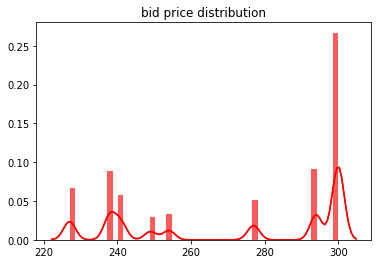

In [11]:
sns.distplot(df, color='red',bins=50)
plt.title("bid price distribution")


plt.show()


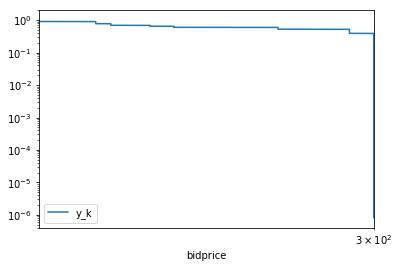

In [12]:
df_freq = df.sort_values(by='bidprice').reset_index(drop=True)
#rankings the sorted values
df_freq = df_freq.reset_index()
#complementary cumalative freq
df_freq['y_k'] = (1.0 - df_freq['index'] / (df_freq.shape[0] + 1))
#plot
df_freq.plot(kind='line', x='bidprice', y='y_k', logx=True, logy=True)
plt.show()

In [13]:
from scipy.stats import kurtosis
from scipy.stats import skew

mean_new=np.mean(df)
var_new=np.var(df)
skew_new=skew(df)
kur_new=kurtosis(df)

print("The mean is %f,variance is %f, skew is %f and kurtosis is %f"%(mean_new,var_new,skew_new,kur_new))

The mean is 272.962046,variance is 835.876395, skew is -0.400087 and kurtosis is -1.614099


In [15]:
distributions =  [st.laplace, st.norm, st.expon, st.dweibull, st.invweibull, st.lognorm, st.uniform]

mles = []

for distribution in distributions:
    pars = distribution.fit(df.bidprice)
    mle = distribution.nnlf(pars, df.bidprice)
    mles.append(mle)

results = [(distribution.name, mle) for distribution, mle in zip(distributions, mles)]

for dist in sorted(zip(distributions, mles), key=lambda d: d[1]):
    print(dist)
best_fit = sorted(zip(distributions, mles), key=lambda d: d[1])[0]
print('Best fit reached using {}, MLE value: {}'.format(best_fit[0].name, best_fit[1]))

print([mod[0].name for mod in sorted(zip(distributions, mles), key=lambda d: d[1])])

/Users/Shuai/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1037: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
/Users/Shuai/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2306: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


(<scipy.stats._continuous_distns.dweibull_gen object at 0x111eaa908>, 10107385.514019549)
(<scipy.stats._continuous_distns.lognorm_gen object at 0x111f7b0b8>, 10275548.080929637)
(<scipy.stats._continuous_distns.uniform_gen object at 0x111fb1b00>, 10430169.619292289)
(<scipy.stats._continuous_distns.norm_gen object at 0x111e935c0>, 11627817.044931918)
(<scipy.stats._continuous_distns.expon_gen object at 0x111eaab70>, 11736328.901903544)
(<scipy.stats._continuous_distns.invweibull_gen object at 0x111f656d8>, 11873092.552926498)
(<scipy.stats._continuous_distns.laplace_gen object at 0x111f65f28>, 12009542.897633623)
Best fit reached using dweibull, MLE value: 10107385.514019549
['dweibull', 'lognorm', 'uniform', 'norm', 'expon', 'invweibull', 'laplace']


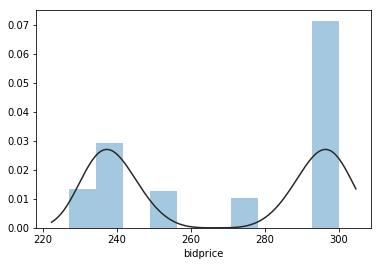

In [20]:
from scipy.stats import dweibull
ax = sns.distplot(df["bidprice"], fit= dweibull, kde=False, bins=50)
ax
plt.show()

In [ ]:
timeplayed = np.flip(np.sort(df['bidprice']), axis=0)
data_sorted = np.sort(timeplayed )

ks_values = []
for clip_count in range(1, 1000):
    clipped_data = data_sorted[:-clip_count]
    
    params = st.lognorm.fit(clipped_data)
    kst = st.kstest(clipped_data, 'dweibull', params)
    
    ks_values.append((clip_count, kst))
        
    if clip_count % 100 == 0:
        print('Finished iteration %i, %s' %(clip_count, kst))